In [53]:
import numpy as np
import pandas as pd
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt

[0.0, 0.0, 0.6253908692933083, 3.314571607254534, 42.589118198874296, 39.89993746091307, 12.445278298936834, 1.125703564727955, 0.0]


Text(0,0.5,'number of wine')

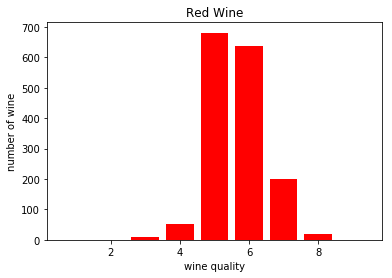

In [54]:
redData = pd.read_csv('winequality-red.csv',sep=';')
yRed = redData['quality']
redCount = [0]*9
for i in range(len(yRed)):
    redCount[yRed[i]-1]+=1
plt.title('Red Wine')
plt.bar(range(1,10),redCount, color='r'); print ([i/sum(redCount)*100 for i in redCount])
plt.xlabel('wine quality'); plt.ylabel('number of wine')

In [55]:
whiteData = pd.read_csv('winequality-white.csv',sep=';')
yWhite = whiteData['quality']
whiteCount = [0]*9
for i in range(len(yWhite)):
    whiteCount[yWhite[i]-1]+=1
#plt.bar(range(1,10),whiteCount); print ([i/sum(whiteCount)*100 for i in whiteCount])
#print(sum(redCount),sum(whiteCount))

In [56]:
wineData = pd.concat([redData,whiteData])

In [57]:
wineData.reset_index()
wineData.reset_index(drop = True, inplace = True)

In [58]:
y = redData['quality']; X=redData; del X['quality'];

In [59]:
yTrans = []
for i in range(len(y)):
    if y[i]<8 : yTrans.append(0)
    else: yTrans.append(1)
y = yTrans

In [88]:
from sklearn.model_selection import train_test_split
xTrain, xTest, yTrain, yTest = train_test_split(X, y, test_size=0.33, random_state=30) 

In [89]:
linearModel = LinearRegression(fit_intercept=True, normalize=True, copy_X=True, n_jobs=8)

In [90]:
result = linearModel.fit(X,y)#(xTrain,yTrain)

In [91]:
result.coef_, result.intercept_

(array([-4.62572050e-03,  1.73047943e-02,  3.46218551e-02,  2.26001275e-04,
        -1.42539413e-01, -7.20576464e-06, -9.74084853e-05, -8.62553795e-01,
        -6.56105689e-02,  4.06196995e-02,  1.45690888e-02]),
 0.9461647296178817)

In [92]:
yHat = result.predict(X)

Text(0,0.5,'expected quality')

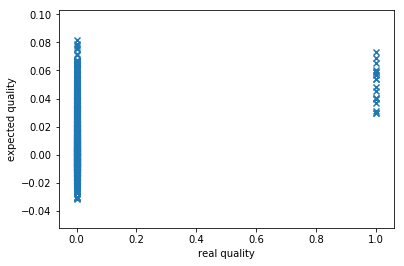

In [93]:
plt.scatter(y, yHat, marker='x')
plt.xlabel('real quality');plt.ylabel('expected quality')

In [94]:
column =list(X.columns);column

['fixed acidity',
 'volatile acidity',
 'citric acid',
 'residual sugar',
 'chlorides',
 'free sulfur dioxide',
 'total sulfur dioxide',
 'density',
 'pH',
 'sulphates',
 'alcohol']

Text(0,0.5,'wine quality')

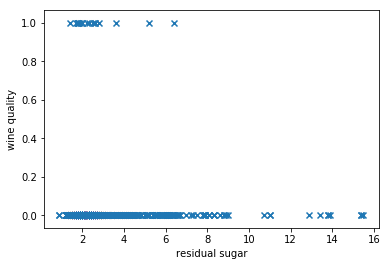

In [95]:
i=3
plt.scatter(X[column[i]],yTrans,marker='x')
plt.xlabel(column[i]);plt.ylabel('wine quality')

In [133]:
from sklearn.linear_model import LogisticRegression

In [134]:
wine = LogisticRegression(fit_intercept=True); wine1 = LogisticRegression(fit_intercept=True)

In [135]:
wine1.fit(X,yTrans)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [136]:
wine1.score(X,yTrans)

0.9887429643527205

In [137]:
wine.fit(xTrain,yTrain)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [138]:
wine.score(xTest,yTest)

0.9924242424242424

In [139]:
wine.intercept_, wine.coef_.ravel()

(array([-0.45499391]),
 array([-0.1663499 , -0.89472055,  1.21253341, -0.10794183, -0.18728383,
         0.02181711, -0.0375018 , -0.45660255, -2.3499295 ,  0.71066604,
         0.60475493]))

In [140]:
column

['fixed acidity',
 'volatile acidity',
 'citric acid',
 'residual sugar',
 'chlorides',
 'free sulfur dioxide',
 'total sulfur dioxide',
 'density',
 'pH',
 'sulphates',
 'alcohol']

In [142]:
wine1.intercept_, wine1.coef_.ravel()

(array([-0.67373236]),
 array([-2.64935525e-01, -6.75379837e-01,  8.12088514e-01, -6.71544415e-02,
        -2.97512580e-01, -2.52577819e-03, -1.49531548e-02, -6.75578723e-01,
        -2.87664523e+00,  8.35507572e-01,  8.13465664e-01]))